In [1]:
#1. Time wrt trajectories

import numpy as np
import time
from SALib.sample import morris

n_vars = 100
p = 4
names = [str(i) for i in range(n_vars)]
bounds = np.array([np.zeros(n_vars),np.ones(n_vars)]).T
problem = {
    'num_vars':   n_vars,
    'num_levels': p,
    'names':      names,
    'bounds':     bounds,
}

start = 400
end = 20000
step = 400

t = np.zeros(int((end-start)/step))
num_tra = np.arange(start, end, step)
i = 0
for n_tra in num_tra:
    t1 = time.time()
    samples = morris.sample(problem, n_tra, num_levels=p)  
    t2 = time.time()
    t[i] = t2-t1
    i += 1
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


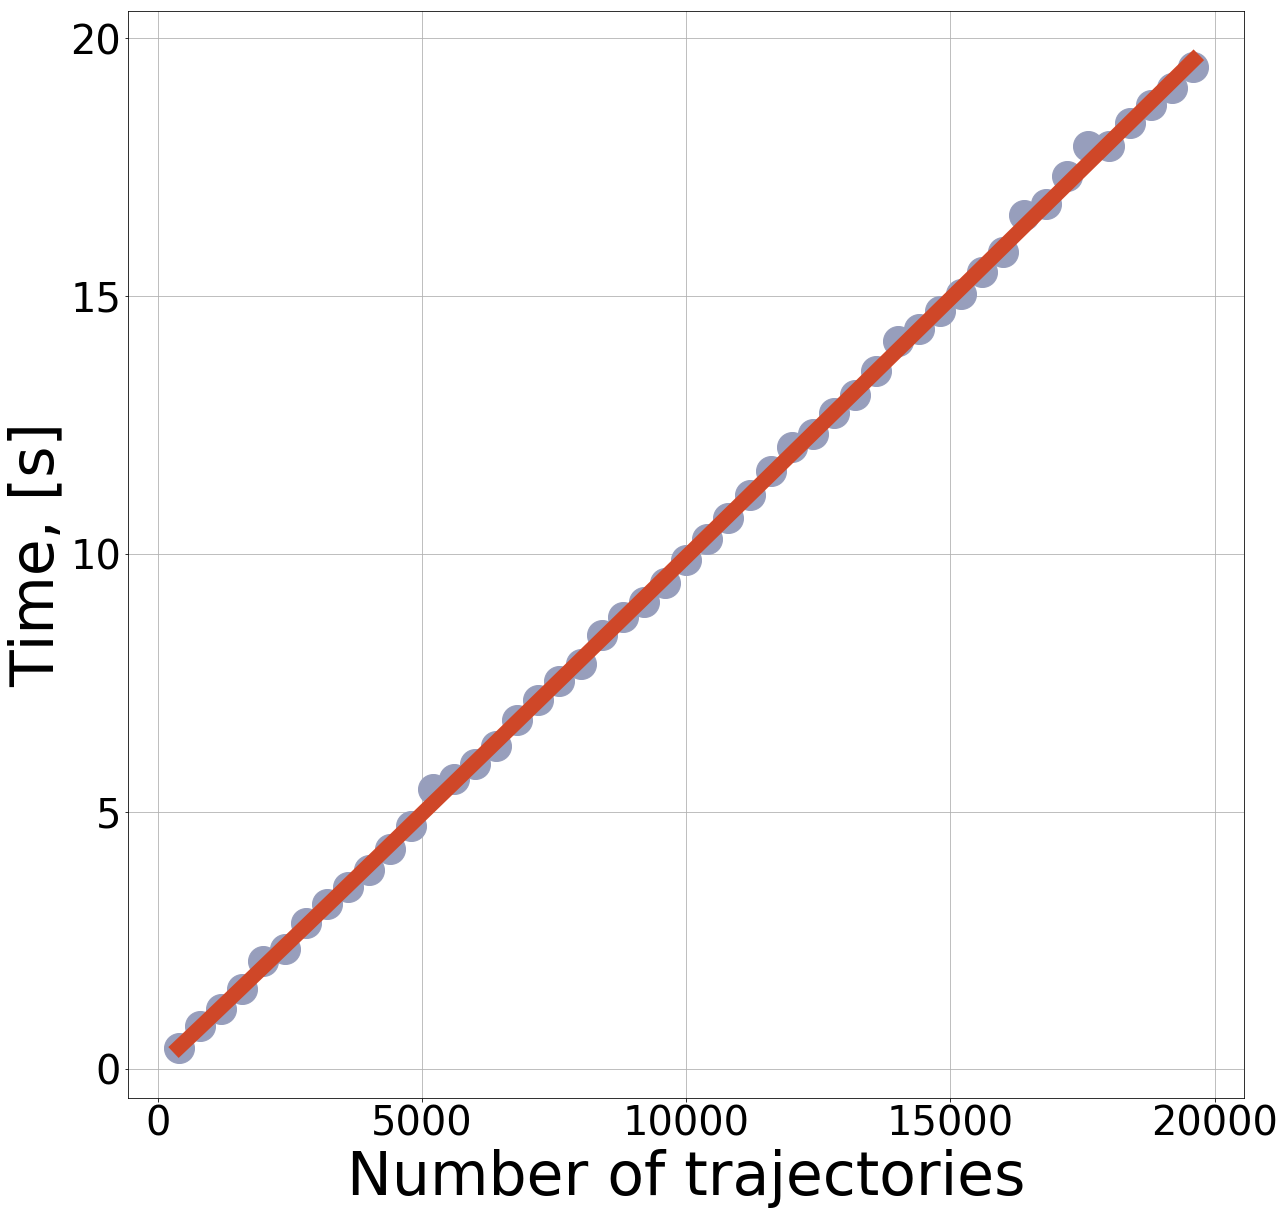

In [7]:
#Fit line
from scipy.optimize import curve_fit

def f(x, A, B, C): # this is your 'straight line' y=f(x)
    return A*x**B + C

A,B,C = curve_fit(f, num_tra, t)[0] 


mycolor1 = (152/256,159/256,189/256)
mycolor2 = (208/256,71/256,40/256)

import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.plot(num_tra,t,'o',color=mycolor1,markersize=30)
plt.plot(num_tra,f(num_tra,A,B,C),color=mycolor2,lw=15)

plt.tick_params(axis='x',which='both',labelsize=40)
plt.tick_params(axis='y',which='both',labelsize=40)
plt.xlabel('Number of trajectories',fontsize=60)
plt.ylabel('Time, [s]',fontsize=60)
plt.grid(True)
plt.locator_params(axis='x',nbins=6)
plt.locator_params(axis='y',nbins=6)

plt.show()